In [54]:
%pylab inline

import csv, os
from glob import glob

import pandas as pd

import shapely.affinity as af
import shapely.geometry as sh

from equivalent_ellipse import *
from scaled_figures import *

pylab.rcParams['savefig.dpi'] = 254

Populating the interactive namespace from numpy and matplotlib


In [55]:
x_list = list()
y_list = list()

with open('../data/custom_cutout_x.csv', 'r') as x_csvfile:
    with open('../data/custom_cutout_y.csv', 'r') as y_csvfile:
        
        x_reader = csv.reader(x_csvfile, delimiter=',', lineterminator='\n')
        y_reader = csv.reader(y_csvfile, delimiter=',', lineterminator='\n')
        
        for row in x_reader:
            x_list += [row]
  
        for row in y_reader:
            y_list += [row]

            
num_cutouts = len(x_list)


x_array = [0,]*num_cutouts
y_array = [0,]*num_cutouts


for i in range(num_cutouts):

    x_array[i] = array(x_list[i], dtype='float')
    y_array[i] = array(y_list[i], dtype='float')

    
cutout = [0,]*num_cutouts

for i in range(num_cutouts):
    cutout[i] = shapely_cutout(x_array[i],y_array[i])

In [56]:
cutout_dimensions = pd.DataFrame.from_csv('../data/custom_cutout_dimensions.csv')

ellipse_def = transpose(array([cutout_dimensions['a'].values,
                               cutout_dimensions['b'].values,
                               cutout_dimensions['width'].values,
                               cutout_dimensions['length'].values,
                               cutout_dimensions['theta'].values]))

In [57]:
# to_measure = loadtxt('cutouts_to_be_measured', dtype=int)
# to_measure

In [58]:
# # Remove cutouts already measured or very close to circles that will be measured
# already_measured = (to_measure == 7) | (to_measure == 35) | (to_measure == 114) | (to_measure == 9)
# to_measure = to_measure[~already_measured]

In [59]:
# cutouts to measure sorted by width
width_sorted = argsort(ellipse_def[:,2])
width_sorted

array([0, 2, 1, 3], dtype=int64)

In [60]:
toRemove = glob('../figures/custom_cutouts/single/*')
for path in toRemove:
    os.remove(path)
    
toRemove = glob('../figures/custom_cutouts/joined/*')
for path in toRemove:
    os.remove(path)

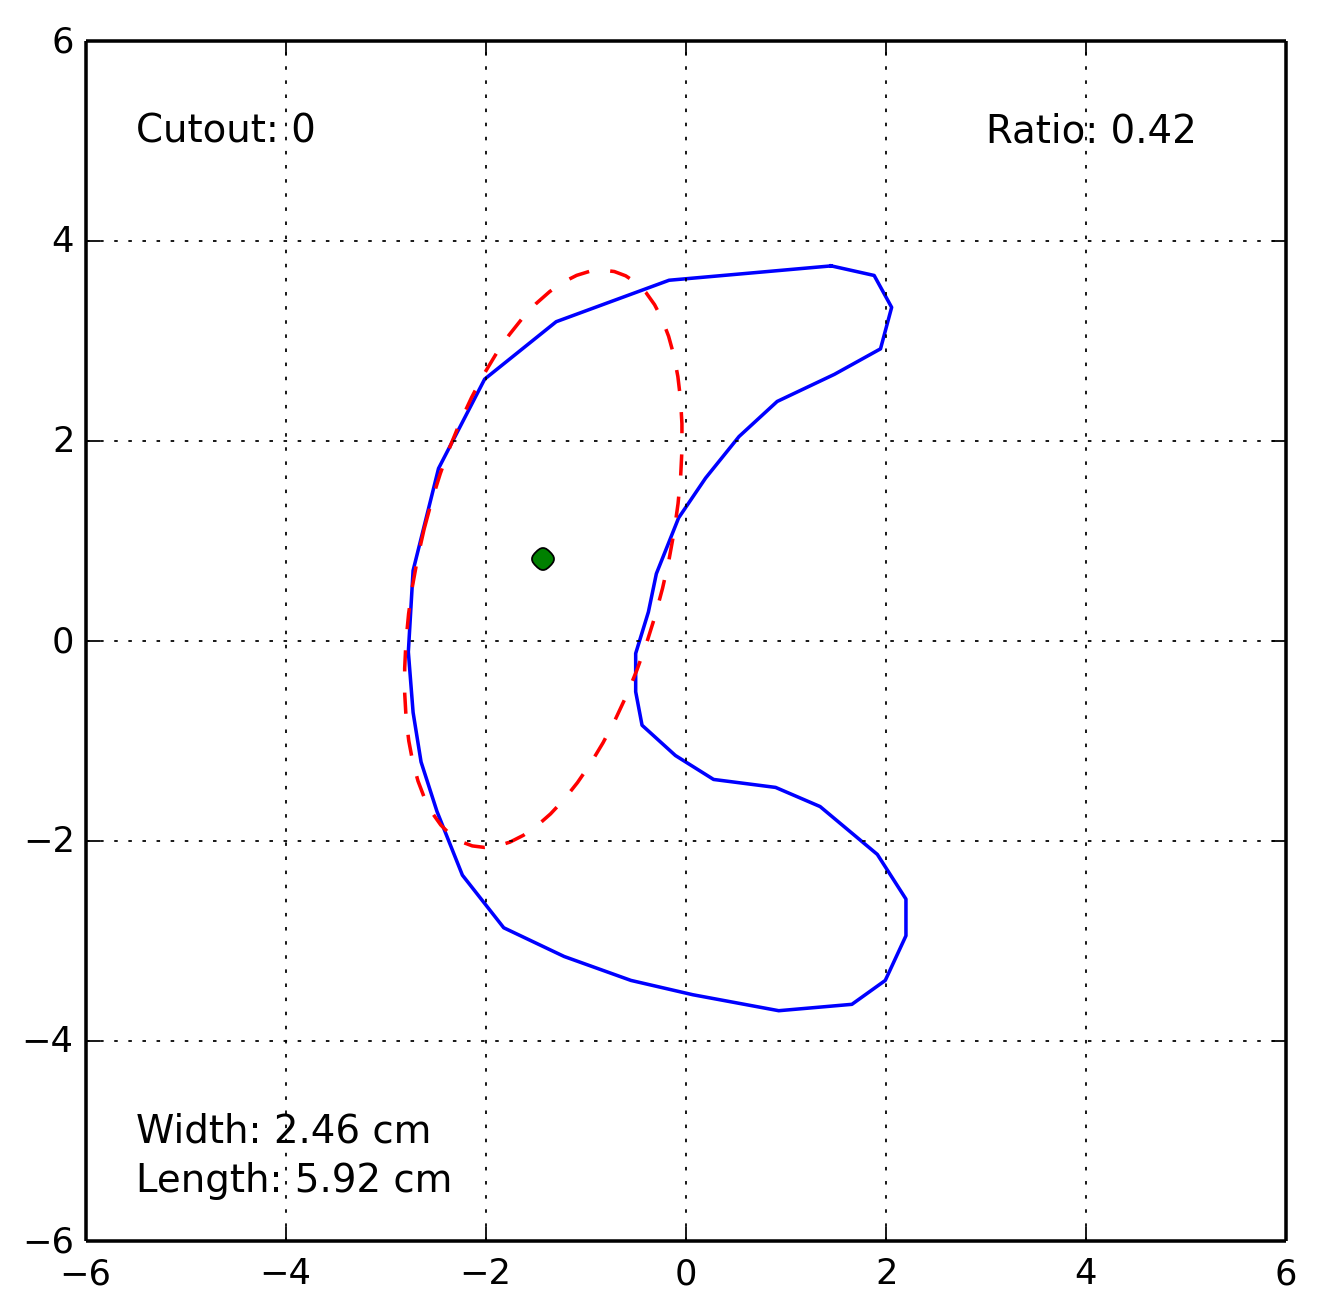

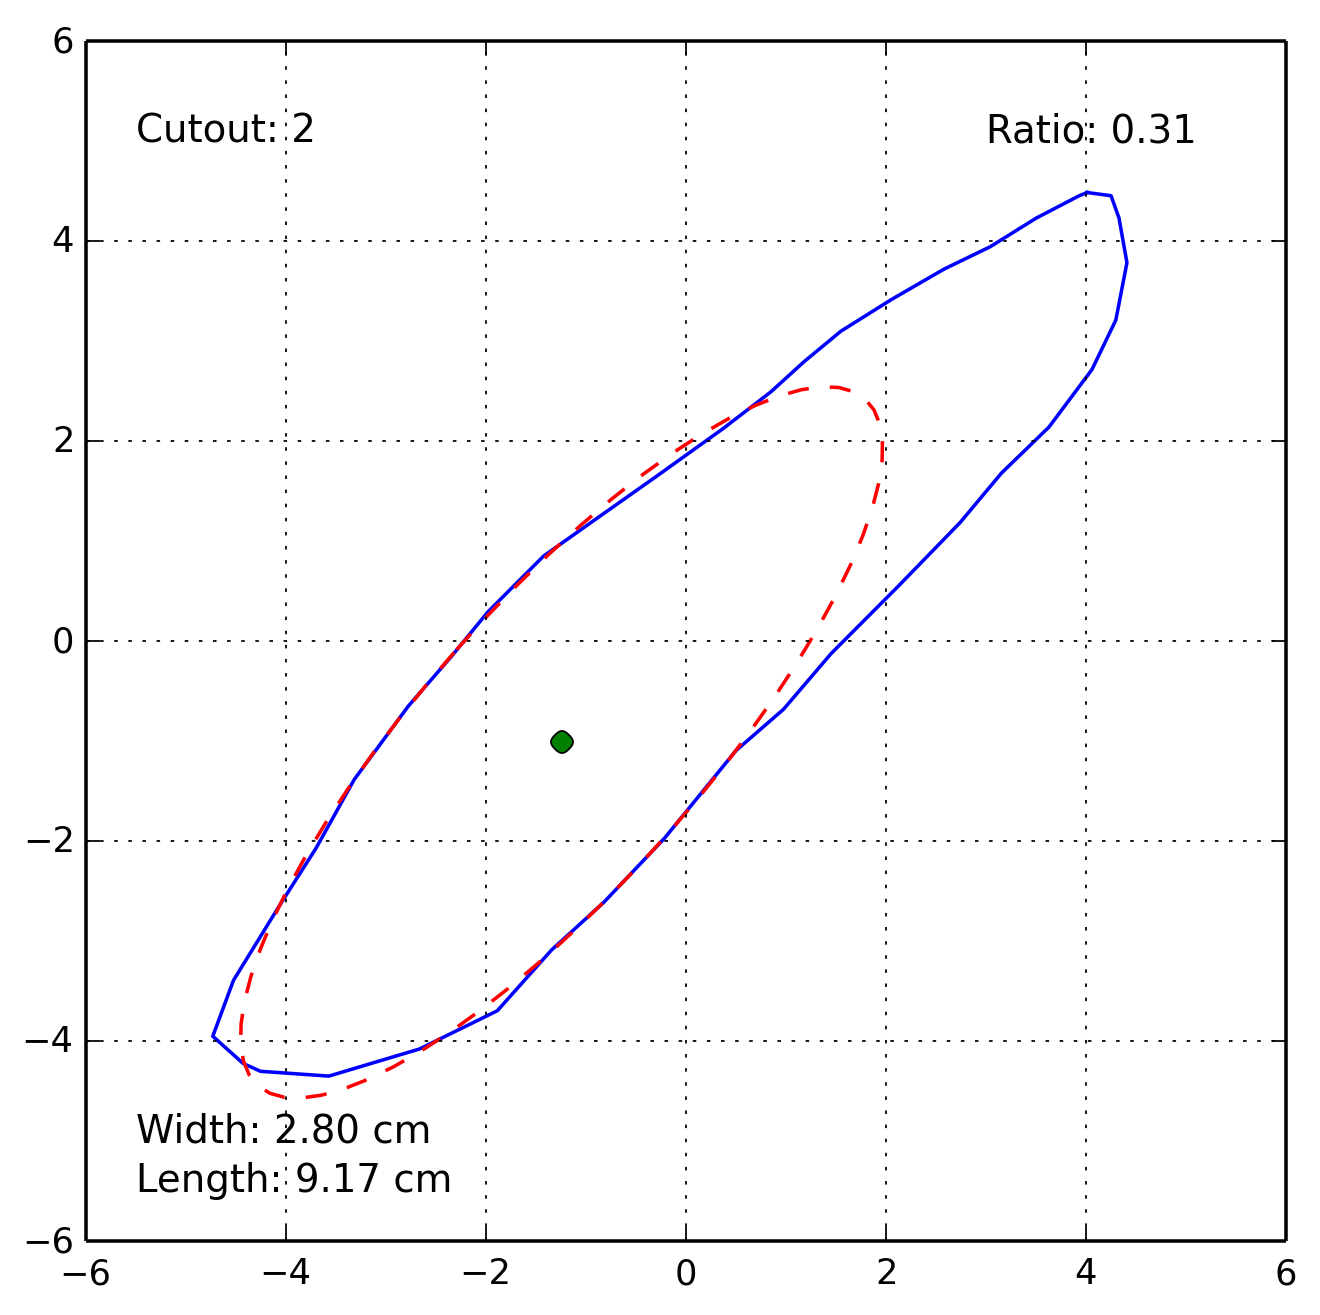

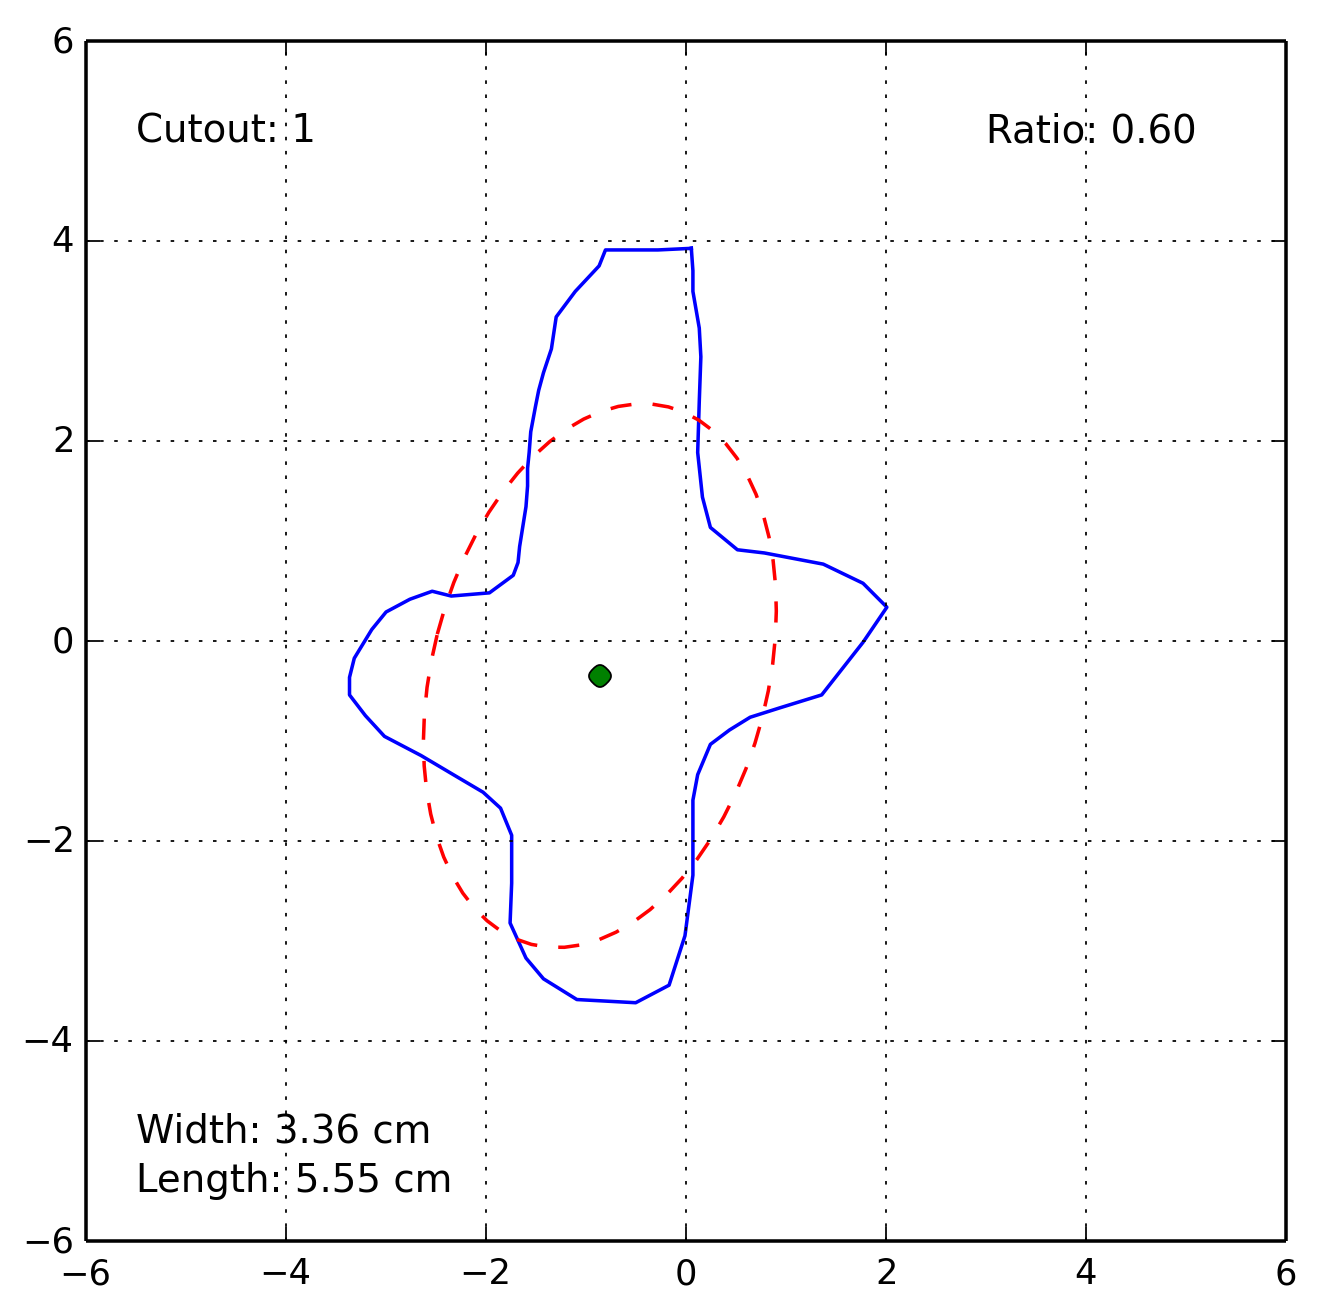

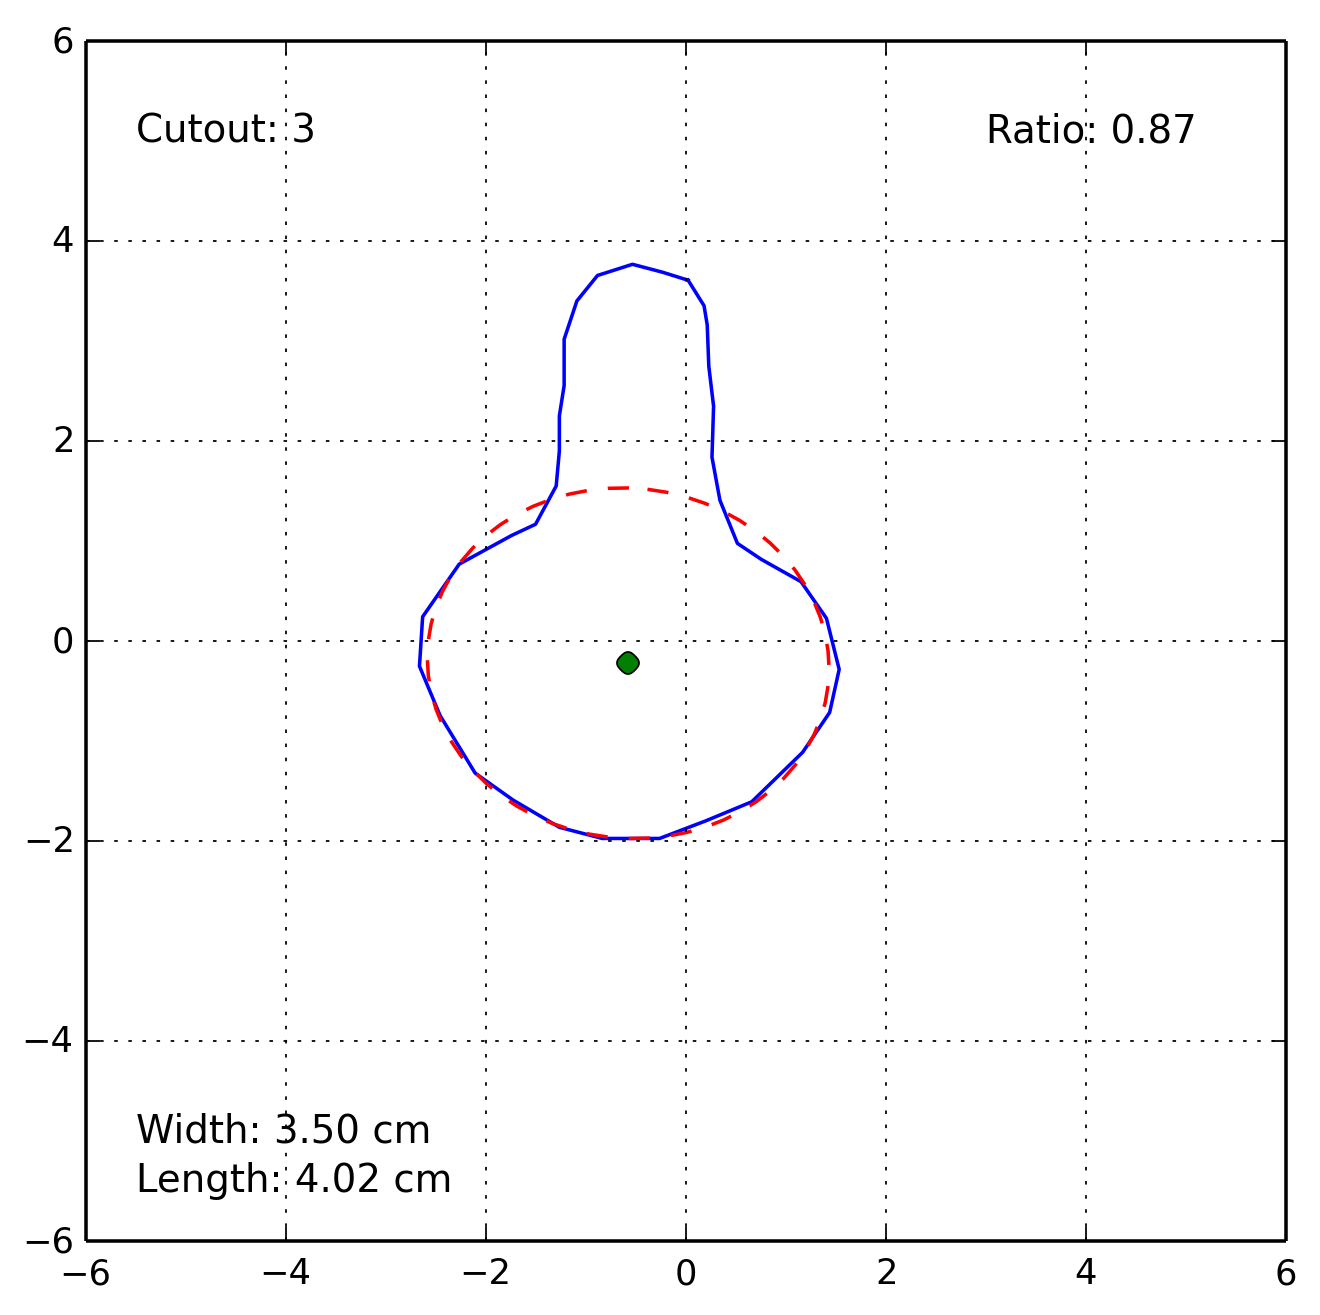

In [61]:
j = 0

for i in width_sorted:

    ellipse = create_ellipse(ellipse_def[i,:])


    scaled_fig_start(12,12)

    plot(cutout[i].exterior.xy[0],cutout[i].exterior.xy[1])
    plot(ellipse.exterior.xy[0],ellipse.exterior.xy[1],'r--')

    plot(ellipse.centroid.xy[0],ellipse.centroid.xy[1],'go')
    
    
    text(-5.5,5,('Cutout: %d' % (i)),fontsize=11)
    text(-5.5,-5,('Width: %.2f cm' % (ellipse_def[i,2])),fontsize=11)
    text(-5.5,-5.5,('Length: %.2f cm' % (ellipse_def[i,3])),fontsize=11)
    text(3,5,('Ratio: %.2f' % ((ellipse_def[i,2]/ellipse_def[i,3]) )),fontsize=11)
    
    scaled_fig_end(12,12)
    
    stringj = "%03d" %(j)
    
    savefig('../figures/custom_cutouts/single/'+stringj+'.png')
    
    j += 1

In [62]:
images = sort(glob('../figures/custom_cutouts/single/*'))

In [63]:
j = 0

for i in range(len(images)//2):
    
    a = imread(images[2*i])
    b = imread(images[2*i + 1])

    c = concatenate((a,b),axis=0)
    
    stringj = "%03d" %(j)
    
    imsave('../figures/custom_cutouts/joined/'+stringj+'.png',c, dpi=254)
    
    j += 1
    
if mod(len(images),2) == 1:
    
    i += 1
    a = imread(images[2*i])
    b = zeros(shape(a))
    
    c = concatenate((a,b),axis=0)
    
    stringj = "%03d" %(j)
    
    imsave('../figures/custom_cutouts/joined/'+stringj+'.png',c, dpi=254)

In [64]:
# See if this can be automated

# OPEN IMAGES IN GIMP "AS LAYER"
# SAVE IMAGES TO GIF "AS ANIMATION" 

# Run imagemagick on resulting file:
# convert -units PixelsPerInch input.gif -density 254 output.pdf